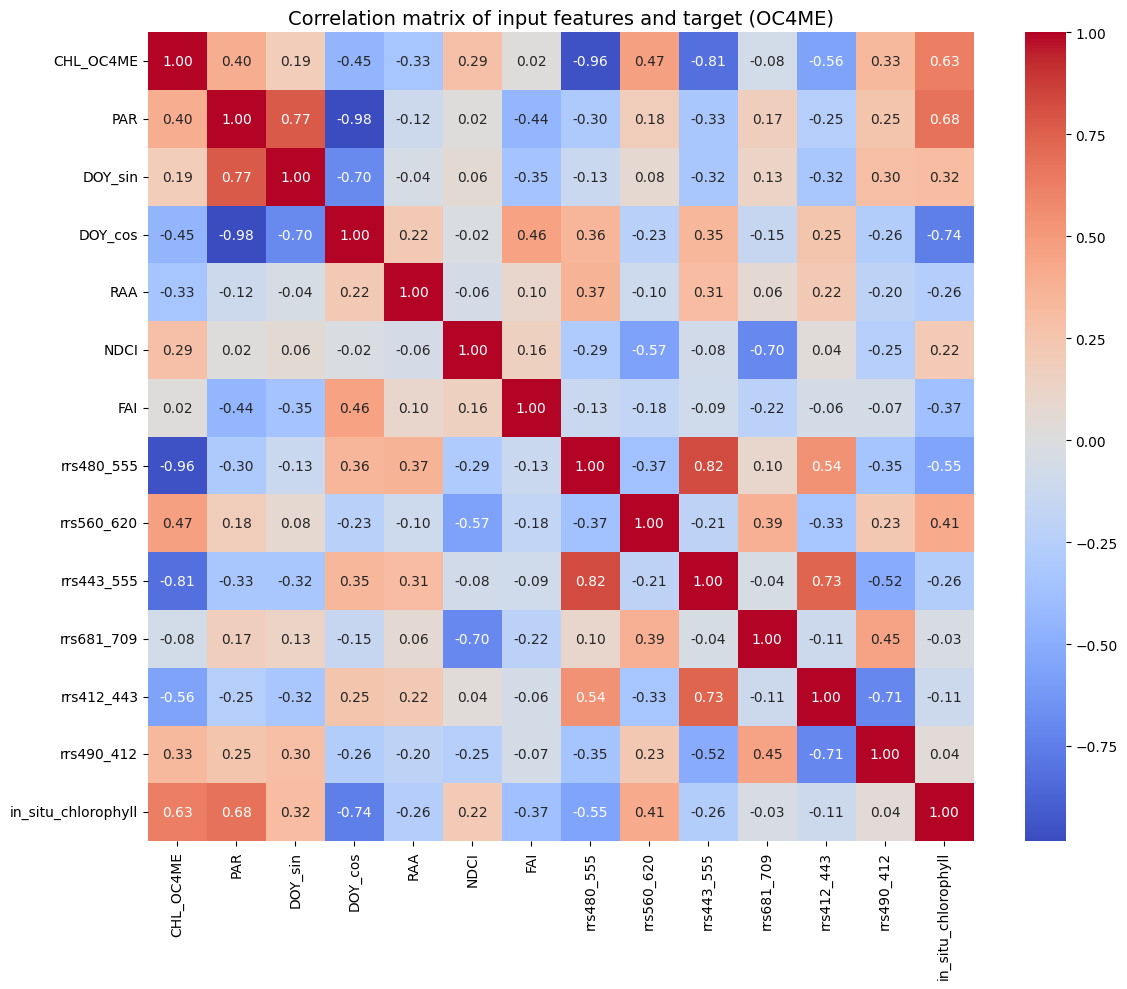

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
CSV = "X_y_OC4ME.csv"
df  = pd.read_csv(CSV)

# Derived features
# Relative Azimuth Angle (RAA)
df["RAA"] = np.abs(df["SAA"] - df["OAA"])
df["RAA"] = df["RAA"].apply(lambda x: x if x <= 180 else 360 - x)

# Seasonal encoding
df["DOY_sin"] = np.sin(2 * np.pi * df["doy"] / 365)
df["DOY_cos"] = np.cos(2 * np.pi * df["doy"] / 365)

# Features 
features = [
    "CHL_OC4ME", "PAR", "DOY_sin", "DOY_cos", "RAA",
    "NDCI", "FAI",
    "rrs480_555", "rrs560_620", "rrs443_555",
    "rrs681_709", "rrs412_443", "rrs490_412",
    "in_situ_chlorophyll"
]

# Correlation matrix
corr = df[features].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
            xticklabels=features, yticklabels=features)

plt.title("Correlation matrix of input features and target (OC4ME)", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_matrix_OC4ME.png", dpi=300, bbox_inches="tight") 
plt.show()


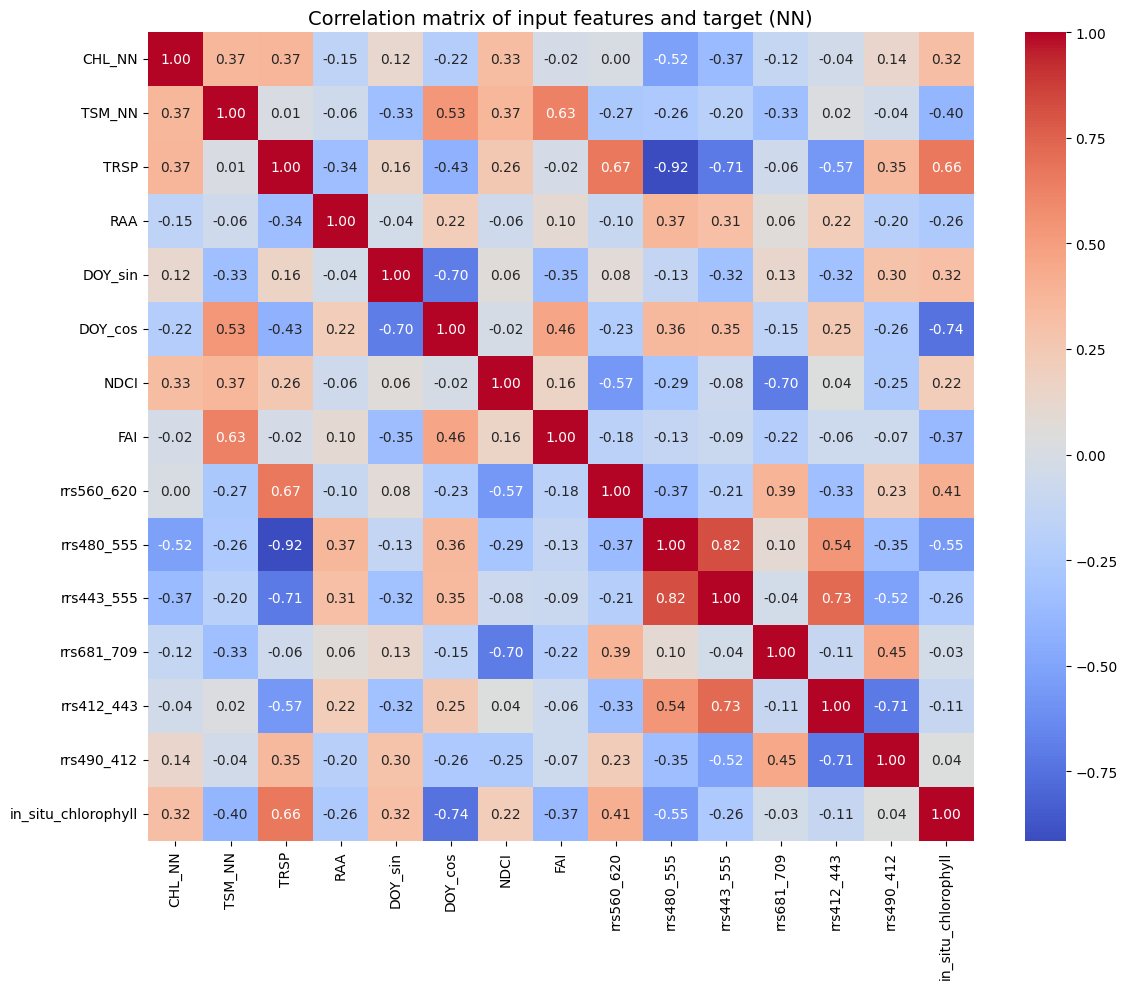

Columns not found: ['mu']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load csv
CSV = "X_y_NN.csv"
feat_candidates = [
    "CHL_NN",
    "TSM_NN", "TRSP",
    "RAA", "DOY_sin", "DOY_cos",
    "NDCI", "FAI", "mu", "rrs560_620",
    "rrs480_555", "rrs443_555", "rrs681_709",
     "rrs412_443", "rrs490_412"
]

# Load
df = pd.read_csv(CSV)

# --- Derived features: RAA, DOY_sin, DOY_cos ---
# Relative Azimuth Angle (RAA) from SAA and OAA if not already present
if "RAA" not in df.columns:
    if {"SAA", "OAA"}.issubset(df.columns):
        raa = np.abs(df["SAA"] - df["OAA"])
        df["RAA"] = np.where(raa <= 180, raa, 360 - raa)
    else:
        # If neither provided, create NaNs so the column exists
        df["RAA"] = np.nan

# Seasonal encoding from DOY 
if "DOY_sin" not in df.columns or "DOY_cos" not in df.columns:
    if "doy" in df.columns:
        df["DOY_sin"] = np.sin(2 * np.pi * df["doy"] / 365.0)
        df["DOY_cos"] = np.cos(2 * np.pi * df["doy"] / 365.0)
    else:
        df.setdefault("DOY_sin", np.nan)
        df.setdefault("DOY_cos", np.nan)

# Features
features = [c for c in feat_candidates if c in df.columns]

# Include in situ
target_cols = [c for c in ["in_situ_chlorophyll"] if c in df.columns]
features_for_corr = features + target_cols

if len(features_for_corr) == 0:
    raise ValueError("None of the requested features/target columns are present in the CSV.")

# Compute correlaiton
corr = df[features_for_corr].corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
    xticklabels=features_for_corr, yticklabels=features_for_corr
)
plt.title("Correlation matrix of input features and target (NN)", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_matrix_NN.png", dpi=300, bbox_inches="tight")
plt.show()

# Print missing
missing = [c for c in feat_candidates + ["in_situ_chlorophyll"] if c not in df.columns]
if missing:
    print("Columns not found:", missing)


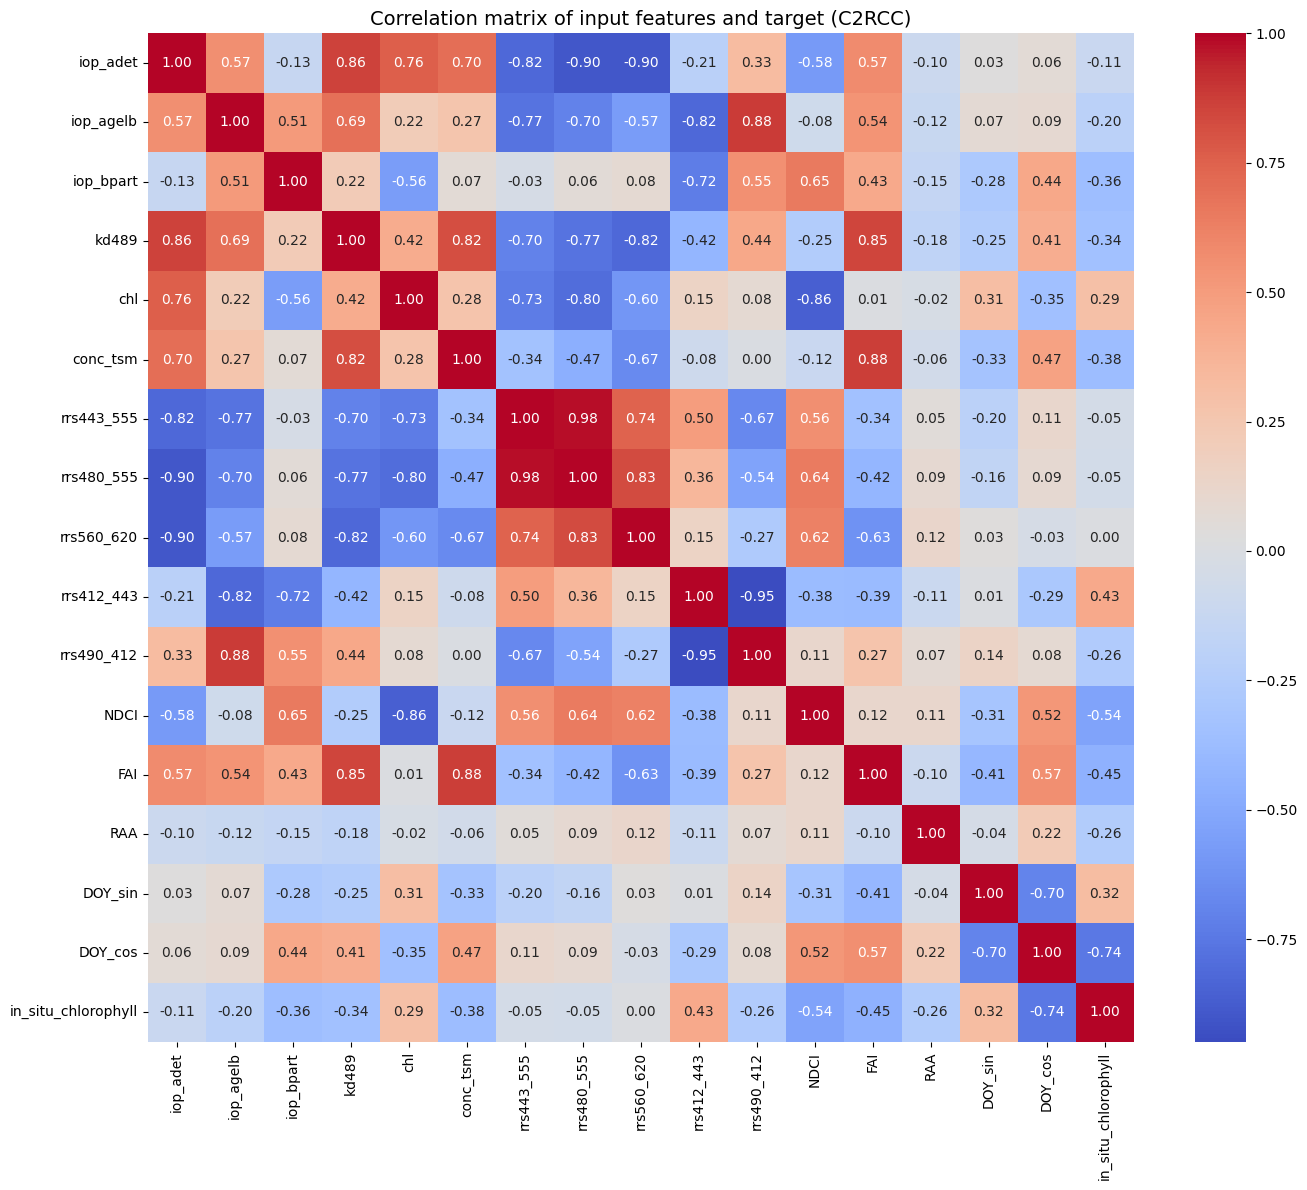

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

CSV = "X_y_C2RCC_DOY.csv"

extra_feat_candidates =  [
     "iop_adet", "iop_agelb", "iop_bpart", 
    "kd489", "chl", "conc_tsm", 
    "rrs443_555", "rrs480_555", "rrs560_620", 
    "rrs412_443", "rrs490_412",
    "NDCI", "FAI",
    "RAA", "DOY_sin", "DOY_cos",
    "mu",   
]

# Load
df = pd.read_csv(CSV)

# Derive RAA
if "RAA" not in df.columns and {"SAA", "OAA"}.issubset(df.columns):
    raa = np.abs(df["SAA"] - df["OAA"])
    df["RAA"] = np.where(raa <= 180, raa, 360 - raa)

#  Derive DOY encodings
if ("DOY_sin" not in df.columns or "DOY_cos" not in df.columns) and "doy" in df.columns:
    df["DOY_sin"] = np.sin(2 * np.pi * df["doy"] / 365.0)
    df["DOY_cos"] = np.cos(2 * np.pi * df["doy"] / 365.0)

# Build actual feature list present in data
features = [c for c in dict.fromkeys(extra_feat_candidates) if c in df.columns]

# Include in situ
target_cols = [c for c in ["in_situ_chlorophyll"] if c in df.columns]
cols = list(dict.fromkeys(features + target_cols))

# Compute correlation
corr = df[cols].corr()

# Plot 
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
    xticklabels=cols, yticklabels=cols
)
plt.title("Correlation matrix of input features and target (C2RCC)", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_matrix_C2RCC.png", dpi=300, bbox_inches="tight")
plt.show()